In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
df = pd.read_csv('sat_gpa.csv')
df

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63
...,...,...
995,1000,2.19
996,1080,1.50
997,1140,3.17
998,1200,1.94


### Scatter plot representing the relationship between GPA and SAT scores

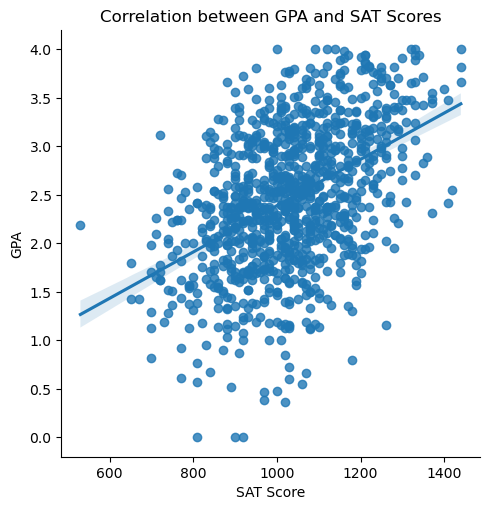

In [12]:
sns.lmplot(x='sat_sum', y='fy_gpa', data=df)
plt.title('Correlation between GPA and SAT Scores')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.show()

### Linear Regression Model

In [14]:
X = df[['sat_sum']]
y = df['fy_gpa']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)
(800,)
(200,)


In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [34]:
y_pred = pipeline.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.4729588536459285
R^2 Score: 0.20167022140686164


In [ ]:
df['Predicted_GPA'] = pipeline.predict(X)

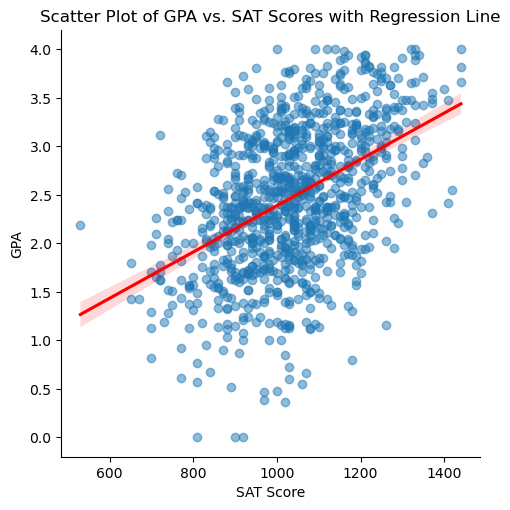

In [37]:
sns.lmplot(x='sat_sum', y='fy_gpa', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of GPA vs. SAT Scores with Regression Line')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.show()

### Interpreting Results

##### The MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. In my case, an MSE of approximately 0.473 suggests that the model has some error in its predictions. 

##### The R-squared value indicates the proportion of variance in the GPA variable that is predictable from the SAT Score variable. An R² of approximately 0.202 means that only about 20.2% of the variance in GPA is explained by the SAT scores. This is relatively low and suggests that SAT scores alone do not explain a large portion of the variance in GPA. A relationship between SAT scores and GPA must not be strong.